# **Classification**


Dataset used: Mushroom dataset

Features of dataset:
1.   Cap Diameter
2.   Cap Shape
3.   Gill Attachment
4.   Gill Color
5.   Stem Height
6.   Stem Width
7.   Stem Color
8.   Season

Target class: Edible or Inedible

The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.








For classification, we'll be implementing the following models on our dataset:
1.  Logistic Regression
2.  Decision Trees
3.  Random Forests
4.  Support Vector Machines (SVM)
5.  k-Nearest Neighbors (kNN)
6.  Naive Bayes

We will be following the below steps in doing so:
1. Data preprocessing
2. Choosing one of the models
3. Training data
4. Testing data
5. Tuning hyperparameters

We will be evaluating our results in the following measures:
1. Accuracy
2. Precision
3. F score
4. Auc Roc curve or Confusion matrix

Performing some necessary preparations:

## 1. Loading the dataset into collab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushroom_cleaned.csv to mushroom_cleaned.csv


## 2. Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## 3. Loading and displaying dataset

In [ ]:
# Load the dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Display the first few rows of the dataset
data.head()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


## 4. Preprocess data

In [ ]:
# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now we will start training and testing of dataset using different models:



#    Naive Bayes






Accuracy: 0.6338484315721292
Precision: 0.6480549199084669
Recall: 0.7202441505595117
F1 Score: 0.682245242110335
ROC AUC Score: 0.6251455016395033


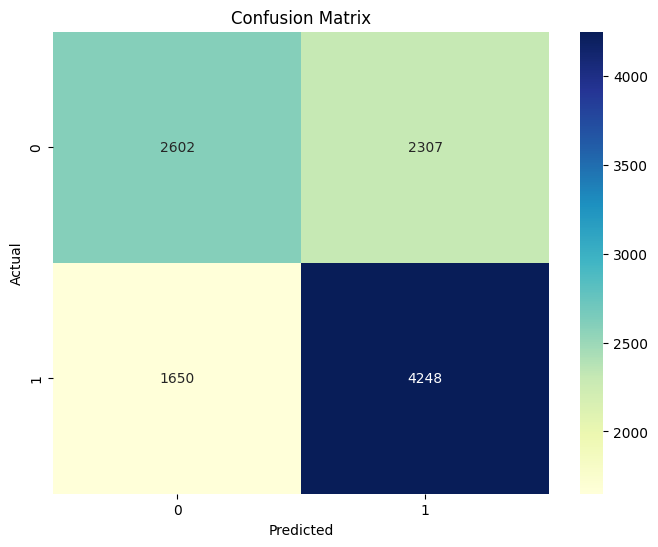

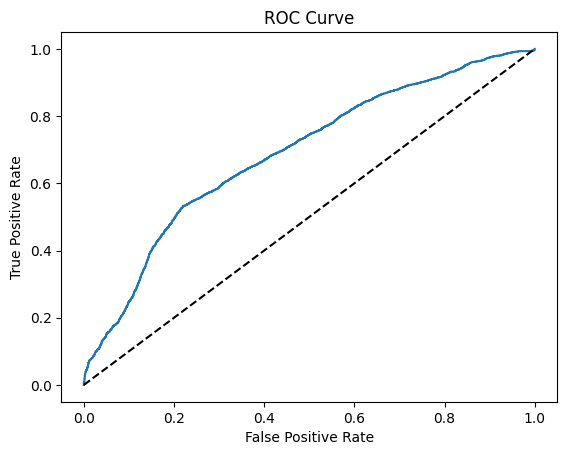

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
data = pd.read_csv('mushroom_cleaned.csv')

# # Display the first few rows of the dataset
# data.head()

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Results for training data:

In [ ]:
# Make predictions on training data
y_train_pred = model.predict(X_train)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Training Results:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)


Training Results:
Accuracy: 0.6350976219117239
Precision: 0.6538269326875024
Recall: 0.7153131177188039
F1 Score: 0.6831893954609359


Checking for overfit or underfit:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Check for overfitting or underfitting using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation Accuracy:", np.mean(cv_scores))


Training Accuracy: 0.6350976219117239
Testing Accuracy: 0.6338484315721292
Precision: 0.6480549199084669
Recall: 0.7202441505595117
F1 Score: 0.682245242110335
ROC AUC Score: 0.6251455016395033
Cross-validation Accuracy: 0.5883593966873323


Since the testing accuracy and training accuracy are close, also there is no significant difference in cross validation accuracy, we can say that it is not a case of overfit, it may be underfit since the accuracies are pretty average.

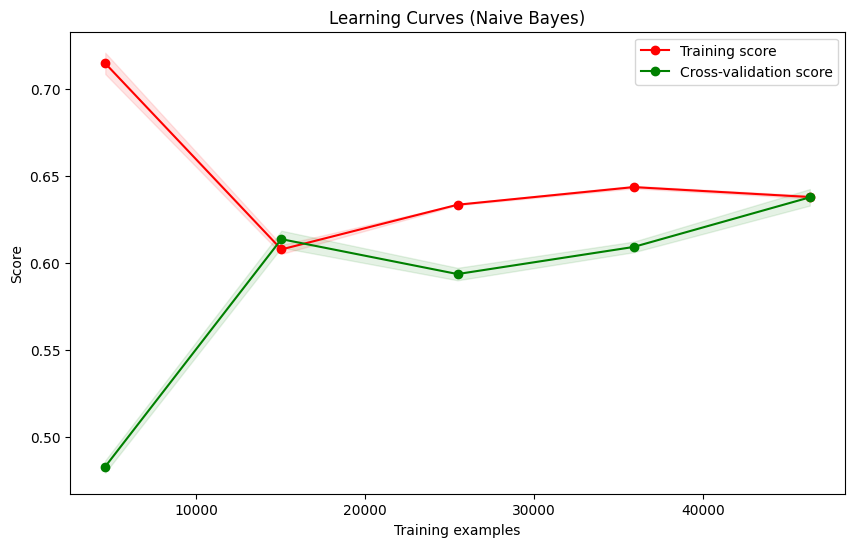

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot Learning Curve
model=GaussianNB()
model.fit(X_train, y_train)
title = "Learning Curves (Naive Bayes)"
cv = KFold(n_splits=7, shuffle=True, random_state=42)
plot_learning_curve(model, title, X, y, cv=cv, n_jobs=-1)

plt.show()


### Applying feature engineering, feature selection to improve our model:

Also applying dimension reduction since one or more features in our dataset have zero variance, which means they are constant across all samples. In other words, these features don't provide any useful information for classification.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Remove constant features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)

# Perform Feature Engineering
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_selected)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Perform Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_final = selector.fit_transform(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Check for overfitting or underfitting using cross-validation
cv_scores = cross_val_score(model, X_final, y, cv=5)
print("Cross-validation Accuracy:", np.mean(cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Accuracy: 0.6081474969926899
Testing Accuracy: 0.6038678634218562
Precision: 0.6222222222222222
Recall: 0.6978636826042727
F1 Score: 0.6578758091584752
ROC AUC Score: 0.594399349959704
Cross-validation Accuracy: 0.6052188396409734


Cross validation accuracy increased a little, but no significant change still. We can say overall it is a good fit.

### Performing k-fold cross validation:

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score

# Define a function for K-fold cross-validation
def test_model(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=55)
    accuracy = make_scorer(accuracy_score)
    accuracy_val_score = cross_val_score(model, X, y, cv=cv, scoring=accuracy)
    return accuracy_val_score.mean()

# Initialize the model
model = GaussianNB()

# Perform K-fold cross-validation
accuracy = test_model(model, X, y)

# Print the mean accuracy
print("Mean Accuracy:", accuracy)


Mean Accuracy: 0.6376052558526881


n_splits = 5: 5-fold cross-validation (80% training, 20% testing)

### Log loss

Fold 1 Log Loss: 0.6788031210577294
Fold 2 Log Loss: 0.683691447411077
Fold 3 Log Loss: 0.6812156254184094
Fold 4 Log Loss: 0.6810637296398148
Fold 5 Log Loss: 0.6790895399039374
Fold 6 Log Loss: 0.6723064400461082
Fold 7 Log Loss: 0.6806247941690452


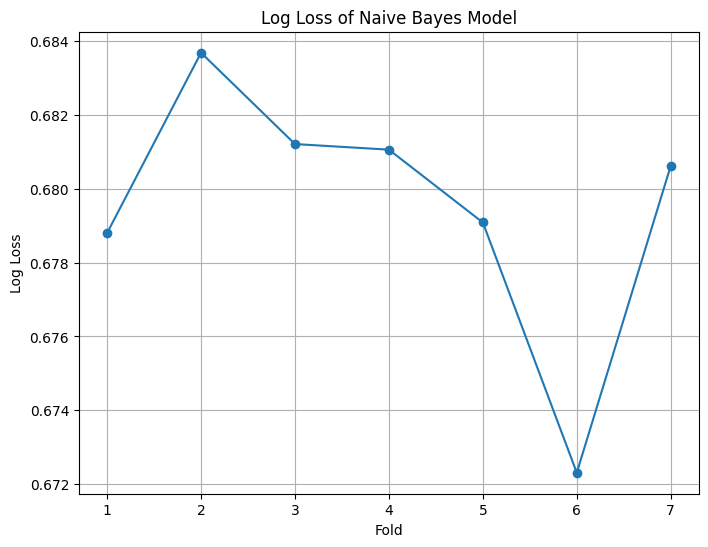

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Initialize the model
model = GaussianNB()

# Perform K-fold cross-validation
cv = KFold(n_splits=7, shuffle=True, random_state=42)
y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')

# Calculate log loss
log_losses = []
for i, (train_index, test_index) in enumerate(cv.split(X)):
    y_true_fold = y[test_index]
    y_pred_proba_fold = y_pred_proba[test_index]
    log_loss_fold = log_loss(y_true_fold, y_pred_proba_fold)
    log_losses.append(log_loss_fold)
    print(f"Fold {i+1} Log Loss: {log_loss_fold}")

# Plot log loss
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 8), log_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.title('Log Loss of Naive Bayes Model')
plt.xticks(np.arange(1, 8))
plt.grid(True)
plt.show()


At 6 folds, the log loss is low, but it is still not a significant difference that the values in case of the other folds.

# Logistic regression

Accuracy: 0.6403138648308535
Precision: 0.6360797912507002
Recall: 0.6313178407585738
F1 Score: 0.631596845207187


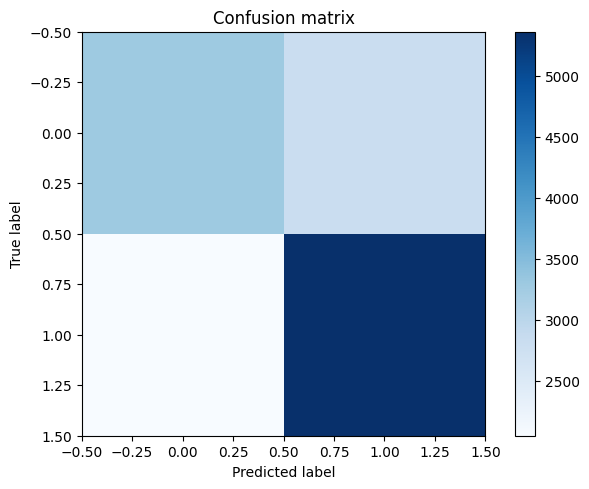

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset here
dataset = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Training the Logistic Regression model
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### Now checking for overfit or underfit:

Training Data Evaluation:
Accuracy: 0.6338400039480827
Precision: 0.6291362144983809
Recall: 0.6252880446825413
F1 Score: 0.6255976066629394

Testing Data Evaluation:
Accuracy: 0.6403138648308535
Precision: 0.6360797912507002
Recall: 0.6313178407585738
F1 Score: 0.631596845207187

The model might be underfitting.


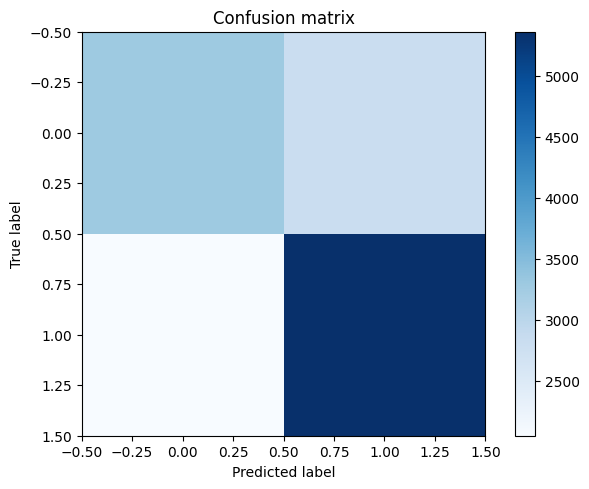

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset here
dataset = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Training the Logistic Regression model
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

# Predicting the Training set results
y_train_pred = classifier.predict(X_train)

# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

# Evaluating the model on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_train = f1_score(y_train, y_train_pred, average='macro')

print("Training Data Evaluation:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

# Evaluating the model on testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("\nTesting Data Evaluation:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

# Check for overfitting or underfitting
if accuracy_train > accuracy_test:
    print("\nThe model might be overfitting.")
elif accuracy_train < accuracy_test:
    print("\nThe model might be underfitting.")
else:
    print("\nThe model seems to have a good fit.")

# Plotting the confusion matrix for testing data
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


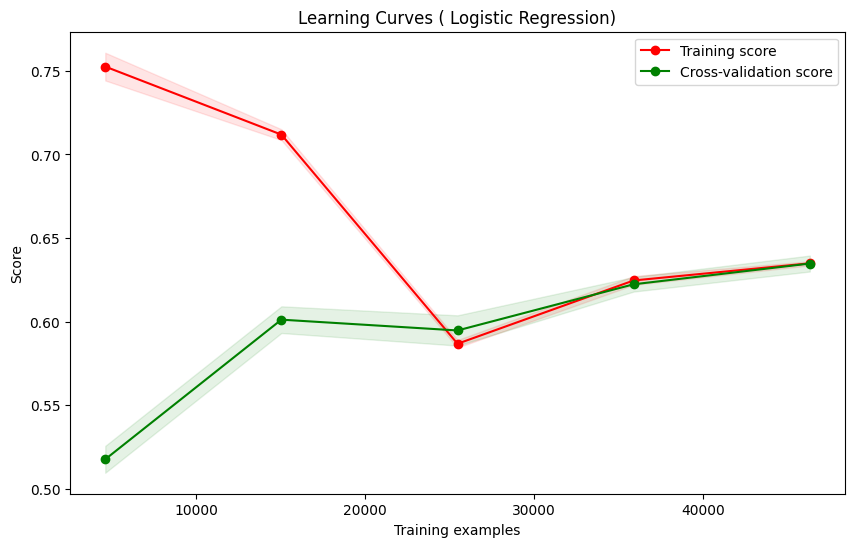

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot Learning Curve
title = "Learning Curves ( Logistic Regression)"
cv = KFold(n_splits=7, shuffle=True, random_state=42)
plot_learning_curve(classifier, title, X, y, cv=cv, n_jobs=-1)

plt.show()


Applying feature selection, scaling and dimension reduction

Training Data Evaluation:
Accuracy: 0.5816759611113853
Precision: 0.5760209064708147
Recall: 0.5750695643759562
F1 Score: 0.5751756015460857

Testing Data Evaluation:
Accuracy: 0.5779850470056999
Precision: 0.57243124082063
Recall: 0.5715821906822554
F1 Score: 0.5716723137301218

The model might be overfitting.


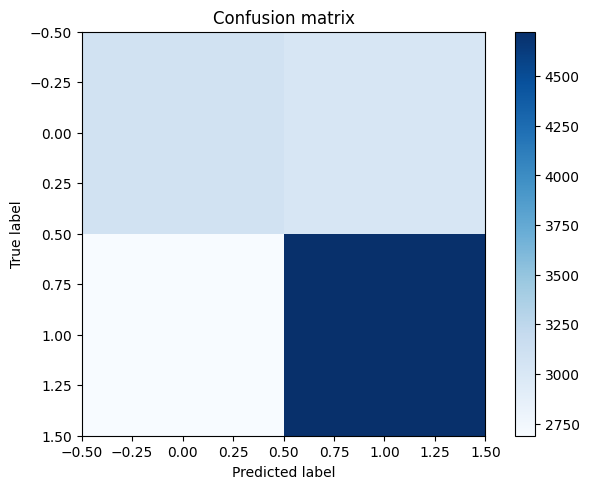

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# Load your dataset here
dataset = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select 5 best features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Feature engineering
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 dimensions
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

# Training the Logistic Regression model
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_pca, y_train)

# Predicting the Training set results
y_train_pred = classifier.predict(X_train_pca)

# Predicting the Test set results
y_test_pred = classifier.predict(X_test_pca)

# Evaluating the model on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_train = f1_score(y_train, y_train_pred, average='macro')

print("Training Data Evaluation:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

# Evaluating the model on testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("\nTesting Data Evaluation:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

# Check for overfitting or underfitting
if accuracy_train > accuracy_test:
    print("\nThe model might be overfitting.")
elif accuracy_train < accuracy_test:
    print("\nThe model might be underfitting.")
else:
    print("\nThe model seems to have a good fit.")

# Plotting the confusion matrix for testing data
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




K fold cross validation

Fold 1, Log Loss: 0.6367233044808692
Fold 2, Log Loss: 0.635177795447239
Fold 3, Log Loss: 0.6434140763894803
Fold 4, Log Loss: 0.6446143383464514
Fold 5, Log Loss: 0.6460333247398697
Fold 6, Log Loss: 0.6392852358496124
Fold 7, Log Loss: 0.6362385659857024
Fold 8, Log Loss: 0.6361387221312206
Fold 9, Log Loss: 0.6299996067888213
Fold 10, Log Loss: 0.6374949783468485


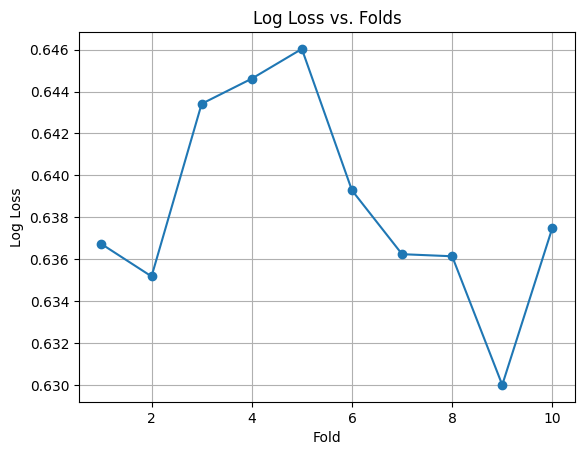

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load your dataset here
dataset = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Define number of folds for cross-validation
num_folds = 10

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select 5 best features

# Feature scaling
scaler = StandardScaler()

# Dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 dimensions

# Logistic Regression model
classifier = LogisticRegression(max_iter=10000)

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

log_losses = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Feature selection
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Feature scaling
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    # Dimensionality reduction
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the model
    classifier.fit(X_train_pca, y_train)

    # Predict probabilities for log loss calculation
    y_prob = classifier.predict_proba(X_test_pca)

    # Calculate log loss
    log_loss_value = log_loss(y_test, y_prob)
    log_losses.append(log_loss_value)

    print(f"Fold {fold}, Log Loss: {log_loss_value}")

# Plot log loss vs. folds
plt.plot(range(1, num_folds + 1), log_losses, marker='o', linestyle='-')
plt.title('Log Loss vs. Folds')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()




At 9 folds, loss is the least, but still there is no significant difference. Hence the model might be underfit.

# Decision tree

Accuracy: 0.9785324326825205
Precision: 0.9795192958700067
Recall: 0.9811800610376399
F1-score: 0.9803489750974081
ROC AUC Score: 0.9782657282169256


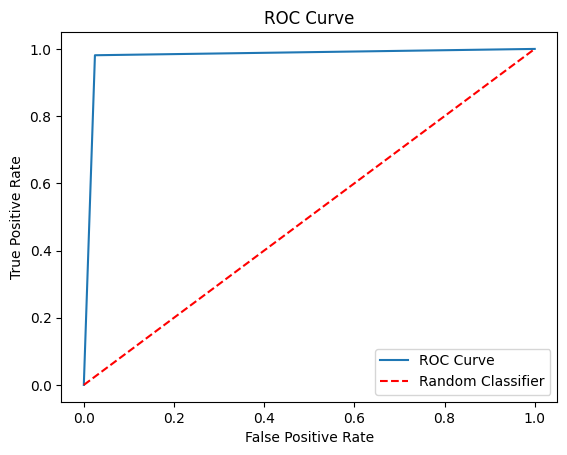

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
y_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Finding overfit or underfit

Training Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC Score: 1.0

Testing Results:
Accuracy: 0.9777921717405386
Precision: 0.9780331192970598
Recall: 0.9813496100373008
F1-score: 0.97968855788761
ROC AUC Score: 0.9774338190744662


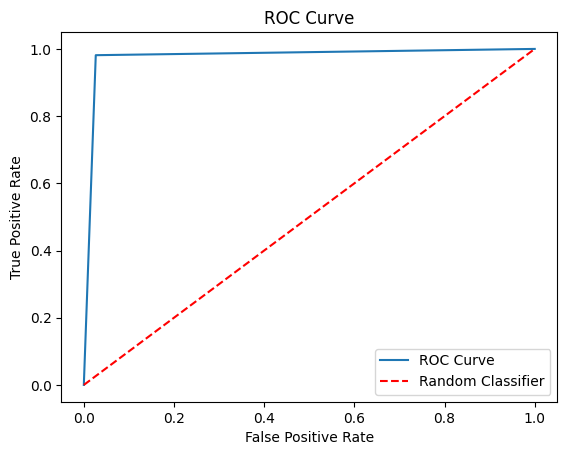


Comparison:
Training Accuracy vs Testing Accuracy: 1.0 vs 0.9777921717405386
Training Precision vs Testing Precision: 1.0 vs 0.9780331192970598
Training Recall vs Testing Recall: 1.0 vs 0.9813496100373008
Training F1-score vs Testing F1-score: 1.0 vs 0.97968855788761
Training ROC AUC Score vs Testing ROC AUC Score: 1.0 vs 0.9774338190744662


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = classifier.predict(X_train)

# Make predictions on the testing set
y_test_pred = classifier.predict(X_test)

# Calculate evaluation metrics for training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

print("Training Results:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("ROC AUC Score:", roc_auc_train)

# Calculate evaluation metrics for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print("\nTesting Results:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("ROC AUC Score:", roc_auc_test)

# Plot ROC curve
y_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compare training and testing results
print("\nComparison:")
print("Training Accuracy vs Testing Accuracy:", accuracy_train, "vs", accuracy_test)
print("Training Precision vs Testing Precision:", precision_train, "vs", precision_test)
print("Training Recall vs Testing Recall:", recall_train, "vs", recall_test)
print("Training F1-score vs Testing F1-score:", f1_train, "vs", f1_test)
print("Training ROC AUC Score vs Testing ROC AUC Score:", roc_auc_train, "vs", roc_auc_test)


It is a good fit. As we can see training data results are very high and testing results are pretty good too.

K fold cross validation

Cross-Validation Accuracy: [0.97490169 0.97201018 0.97467037 0.97281666 0.97200694]
Mean Accuracy: 0.973281166402902

Testing Results:
Accuracy: 0.9782548348292773
Precision: 0.9782131396723527
Recall: 0.9820278060359444
F1-score: 0.9801167611473052
ROC AUC Score: 0.9778747708118202


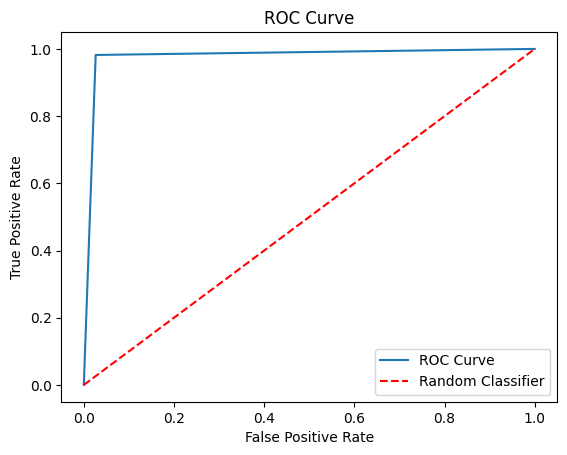


Comparison:
Cross-Validation Mean Accuracy vs Testing Accuracy: 0.973281166402902 vs 0.9782548348292773
Cross-Validation Mean Precision vs Testing Precision: 0.973281166402902 vs 0.9782131396723527
Cross-Validation Mean Recall vs Testing Recall: 0.973281166402902 vs 0.9820278060359444
Cross-Validation Mean F1-score vs Testing F1-score: 0.973281166402902 vs 0.9801167611473052
Cross-Validation Mean ROC AUC Score vs Testing ROC AUC Score: 0.973281166402902 vs 0.9778747708118202


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Assuming the last column is the target column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
classifier = DecisionTreeClassifier()

# Perform k-fold cross-validation
k = 5
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k, scoring='accuracy')

print("Cross-Validation Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_test_pred = classifier.predict(X_test)

# Calculate evaluation metrics for testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print("\nTesting Results:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("ROC AUC Score:", roc_auc_test)

# Plot ROC curve
y_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# # Plot decision tree for one test sample
# plt.figure(figsize=(20,10))
# plot_tree(classifier, max_depth=2, filled=True, feature_names=X.columns, class_names=True)
# plt.show()

# Compare cross-validation and testing results
print("\nComparison:")
print("Cross-Validation Mean Accuracy vs Testing Accuracy:", cv_scores.mean(), "vs", accuracy_test)
print("Cross-Validation Mean Precision vs Testing Precision:", cv_scores.mean(), "vs", precision_test)
print("Cross-Validation Mean Recall vs Testing Recall:", cv_scores.mean(), "vs", recall_test)
print("Cross-Validation Mean F1-score vs Testing F1-score:", cv_scores.mean(), "vs", f1_test)
print("Cross-Validation Mean ROC AUC Score vs Testing ROC AUC Score:", cv_scores.mean(), "vs", roc_auc_test)


It does not show much change.

# K nearest neighbours

Accuracy: 0.7162024613676321
Precision: 0.7378591833305327
Recall: 0.7444896575110207
F1 Score: 0.7411595915267112
AUC-ROC Score: 0.7963351097813367


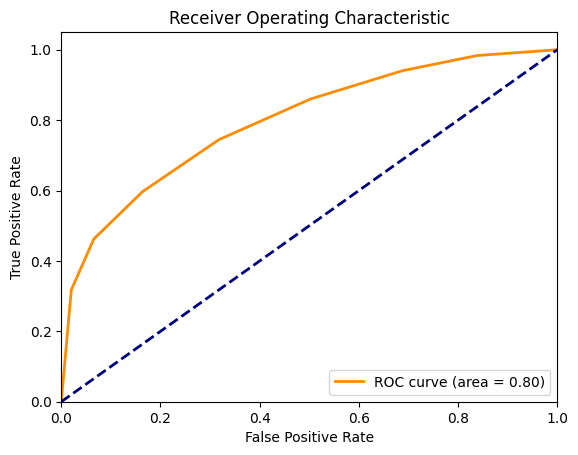

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Handle categorical data
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve
y_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Overfit or underfit

Training Accuracy: 0.711298232627001
Training Precision: 0.7358947588223012
Training Recall: 0.7410943348614207
Training F1 Score: 0.7384853945769249
Testing Accuracy: 0.6965855464051078
Testing Precision: 0.7207890743550834
Testing Recall: 0.724821973550356
Testing F1 Score: 0.7227998985544002
AUC-ROC Score: 0.7846361942663357


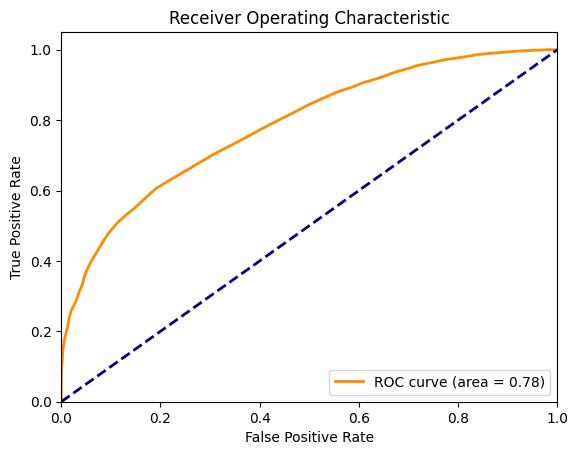

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Handle categorical data
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
k = 73
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

# Calculate ROC curve
y_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print AUC-ROC score
print("AUC-ROC Score:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Since the training accuracy is higher than testing accuracy, the model is overfit.

Hyperparameter tuning

Best Parameters: {'n_neighbors': 5}
Training Accuracy: 0.991301933931711
Training Precision: 0.9909781377197767
Training Recall: 0.9932287504731463
Training F1 Score: 0.9921021677029069
Testing Accuracy: 0.9895438141945035
Testing Precision: 0.9880209212080311
Testing Recall: 0.9928789420142421
Testing F1 Score: 0.9904439746300212
AUC-ROC Score: 0.9965877961607255


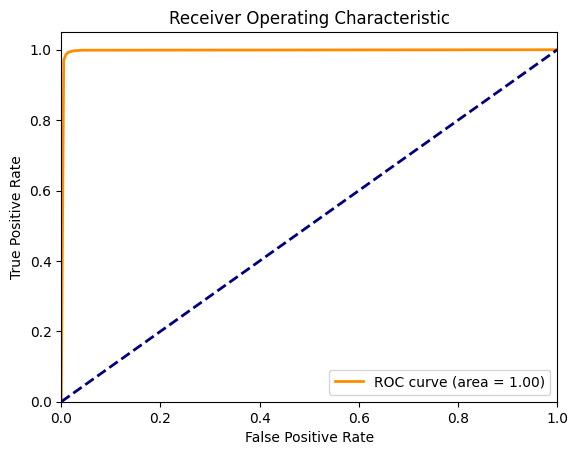

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Handle categorical data
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

# Calculate ROC curve
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print AUC-ROC score
print("AUC-ROC Score:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


After hyperparameter tuning with Grid_cv, results have been improved and the model is now a good fit.

K fold cross validation:

Best Parameters: {'n_neighbors': 5}
Cross-Validation Accuracy: 0.5648931248265013
Cross-Validation Precision: 0.6081585322839231
Cross-Validation Recall: 0.5769839932603201
Cross-Validation F1 Score: 0.5907559156329921
Training Accuracy: 0.991301933931711
Training Precision: 0.9909781377197767
Training Recall: 0.9932287504731463
Training F1 Score: 0.9921021677029069
Testing Accuracy: 0.9895438141945035
Testing Precision: 0.9880209212080311
Testing Recall: 0.9928789420142421
Testing F1 Score: 0.9904439746300212
AUC-ROC Score: 0.9965877961607255


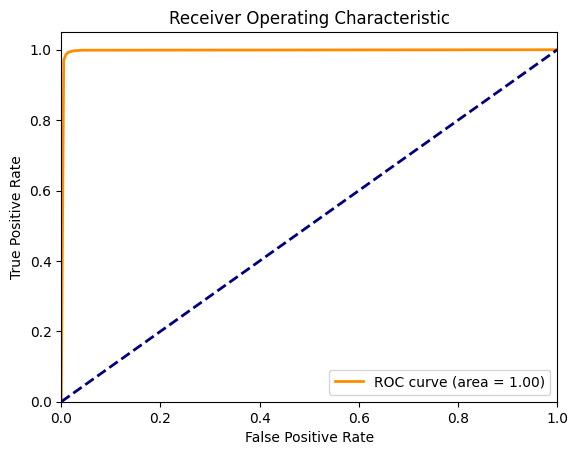

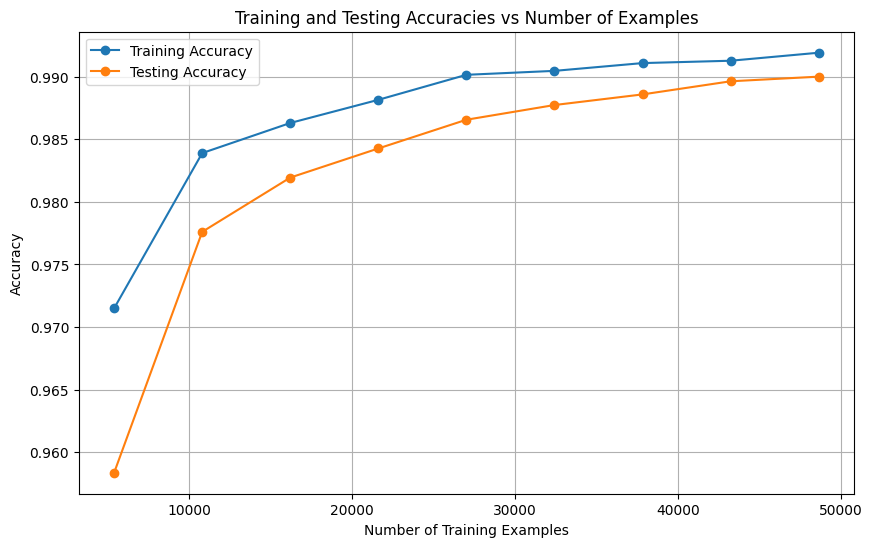

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Handle categorical data
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# K-fold cross-validation
cv_accuracy = cross_val_score(best_model, X_scaled, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_model, X_scaled, y, cv=5, scoring='precision')
cv_recall = cross_val_score(best_model, X_scaled, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(best_model, X_scaled, y, cv=5, scoring='f1')

# Print cross-validation scores
print("Cross-Validation Accuracy:", cv_accuracy.mean())
print("Cross-Validation Precision:", cv_precision.mean())
print("Cross-Validation Recall:", cv_recall.mean())
print("Cross-Validation F1 Score:", cv_f1.mean())

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

# Calculate ROC curve
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print AUC-ROC score
print("AUC-ROC Score:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Initialize lists to store results
train_sizes = []
train_accuracies = []
test_accuracies = []

# Iterate over different training set sizes
for train_size in np.arange(0.1, 1.0, 0.1):
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    # Train the classifier
    knn.fit(X_train_scaled, y_train)

    # Predictions on training data
    y_train_pred = knn.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predictions on testing data
    y_test_pred = knn.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results to lists
    train_sizes.append(len(y_train))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot training and testing accuracies vs number of examples
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(train_sizes, test_accuracies, marker='o', linestyle='-', label='Testing Accuracy')
plt.title('Training and Testing Accuracies vs Number of Examples')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

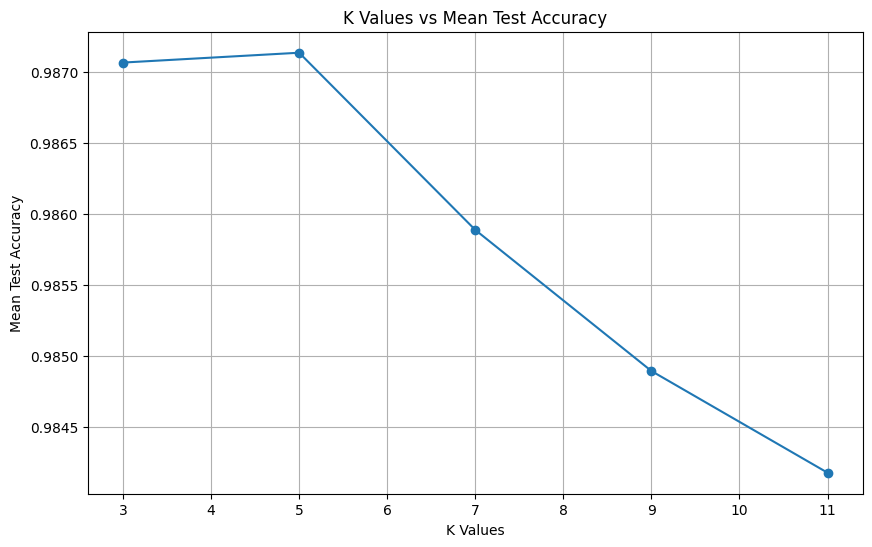

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Handle categorical data
label_encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot k values vs accuracies
plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'], marker='o', linestyle='-')
plt.title('K Values vs Mean Test Accuracy')
plt.xlabel('K Values')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)
plt.show()


# Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Assuming your target column is named 'class'
X = data.drop('class', axis=1)
y = data['class']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting SVM to the Training set
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Using rbf kernel, because linear kernel works slow for large datasets.

Accuracy: 0.9081151105764782
Precision: 0.9163130198608046
F1 Score: 0.9157689371447959
ROC AUC Score: 0.9073988572349068


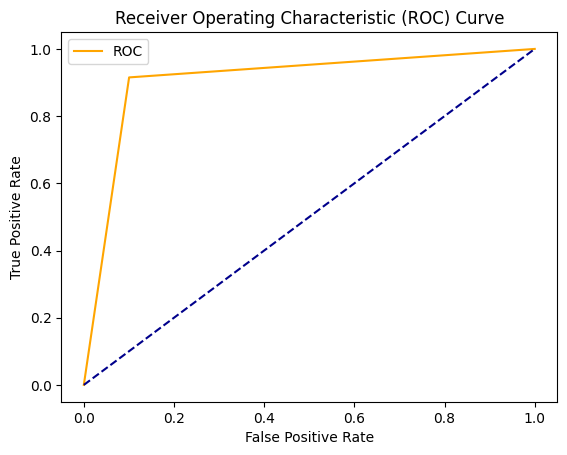

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Assuming your target column is named 'target'
X = data.drop('class', axis=1)
y = data['class']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting SVM to the Training set
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Checking for overfit or underfit

Accuracy: 0.9081151105764782
Precision: 0.9163130198608046
Recall: 0.915225500169549
F1 Score: 0.9157689371447959
ROC AUC Score: 0.9073988572349068

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4909
           1       0.92      0.92      0.92      5898

    accuracy                           0.91     10807
   macro avg       0.91      0.91      0.91     10807
weighted avg       0.91      0.91      0.91     10807


Confusion Matrix:
[[4416  493]
 [ 500 5398]]


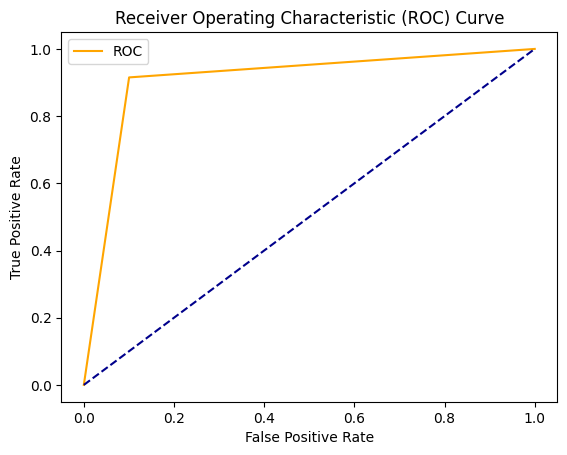

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('mushroom_cleaned.csv')

# Assuming your target column is named 'target'
X = data.drop('class', axis=1)
y = data['class']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting SVM to the Training set
svm_classifier = SVC(kernel='rbf', random_state=42) #this is by default soft margin
svm_classifier.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = svm_classifier.predict(X_test_scaled)

# Training set results
train_pred = svm_classifier.predict(X_train_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Random forest classification

Accuracy: 0.9903769045709703
Precision: 0.9913092550790068
Recall: 0.9910855337395622
F1 Score: 0.9911973817853517
AUC-ROC Score: 0.9903039588686927


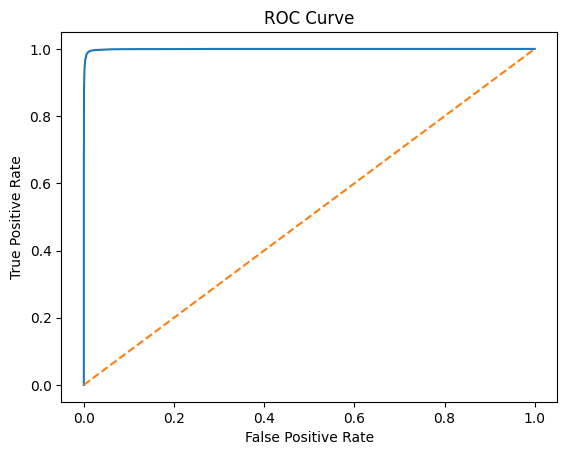

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("mushroom_cleaned.csv")

# Split the dataset into features and target variable
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

# Plotting the ROC curve
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Final results

**Model and accuracy**


---

Naive Bayes - 63.7% (After k-fold validation)


---


Logistic Regression - 64.1%


---


Decision tree - 97.8%


---


K nearest neighbours - 98.9% (After hyperparameter tuning)


---


SVM - 90.8%


---


Random forest - 99.03%


---

